In [60]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import json
import re
import nltk
nltk.download('stopwords')
import math
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import ast
import collections
import time
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def process_and_display_data(file):


  data = pd.read_csv(file)

  #Drop useless columns
  data = data.drop(['author_flair_background_color',
                    'author_flair_css_class',
                    'author_flair_text',
                    'brand_safe',
                    'contest_mode',
                    'gilded',
                    'is_reddit_media_domain',
                    'is_video',
                    'link_flair_richtext',
                    'link_flair_text_color',
                    'link_flair_type',
                    'locked',
                    'media_embed',
                    'no_follow',
                    'num_crossposts',
                    'parent_whitelist_status',
                    'secure_media_embed',
                    'send_replies',
                    'spoiler',
                    'stickied',
                    'subreddit',
                    'subreddit_id',
                    'subreddit_type',
                    'suggested_sort'
                    ], axis = 1)

  #Convert utc to datetime
  for i in range(len(data['author_created_utc'])):
    if data['author_created_utc'][i] != data['author_created_utc'][i]:
      continue
    data['author_created_utc'][i] = dt.datetime.fromtimestamp(data['author_created_utc'][i]) 

  for i in range(len(data['author_created_utc'])):
    if data['created_utc'][i] != data['created_utc'][i]:
      continue
    data['created_utc'][i] = dt.datetime.fromtimestamp(data['created_utc'][i]) 

  #Sort rows by date of post created
  data.sort_values(by="created_utc", inplace = True)

  vocab_size = []
  avg_words = 0
  data['num_words'] = 0
  #Process comments
  for i in range(len(data['comments'])):
      clean = re.sub("[^a-zA-Z]+"," ",str(data['comments'][i]))
      clean = clean.lower().split()
      data['num_words'][i] = len(clean)
      avg_words += len(clean)
      vocab_size = vocab_size + clean
      data['comments'][i] = clean

  #Drop existing index
  data = data.reset_index(drop=True)

  #Add year and week columns
  data['week'] = data['created_utc'].map(lambda x: x.isocalendar()[1])
  data['year'] = data['created_utc'].map(lambda x: x.isocalendar()[0])

  #Convert boolean to binary
  # data['over_18'] = data['over_18'].astype(int)

  #Add required columns
  data['is_misogynist'] = 0
  data['is_cat_1'] = 0
  data['is_cat_2'] = 0
  data['is_cat_3'] = 0
  data['is_cat_4'] = 0
  data['is_cat_5'] = 0
  data['is_cat_6'] = 0
  data['is_cat_7'] = 0
  data['is_cat_8'] = 0
  data['is_cat_9'] = 0
  data['num_cat_1'] = 0
  data['num_cat_2'] = 0
  data['num_cat_3'] = 0
  data['num_cat_4'] = 0
  data['num_cat_5'] = 0
  data['num_cat_6'] = 0
  data['num_cat_7'] = 0
  data['num_cat_8'] = 0
  data['num_cat_9'] = 0
  data['total_mis_words'] = 0

  #Display data
  
  display(data.head())

  print("Num posts : {}".format(len(data['comments'])))
  print("Mindate : {}".format(min(data['created_utc'])))
  print("Maxdate : {}".format(max(data['created_utc'])))
  print("Avg num comments : {}".format(data['num_comments'].mean()))
  print("Max num comments : {}".format(data['num_comments'].max()))
  print("Min num comments : {}".format(data['num_comments'].min()))
  print("Vocab size : {}".format(len(set(vocab_size))))
  print("Avg num words per comment: {}".format(avg_words/len(data['comments'])))
  print("Avg score : {}".format(data['score'].mean()))
  print("Max score : {}".format(data['score'].max()))
  print("Min score : {}".format(data['score'].min()))

  return data

In [0]:
def load_lexicon():
  with open('lexicon.json', 'r') as fp:
    lexicon = json.load(fp)
  return lexicon

In [0]:
def fill_table(data, lexicon):
  mis_words_used = {1:[],2:[],3:[],4:[],
                    5:[],6:[],7:[], 8:[],9:[]}

  for i in range(len(data['comments'])):

    for category in range(1,10):

      list_mis_words = lexicon[str(category)]
      common_words = [x for x in list_mis_words if x in data['comments'][i]]

      if len(common_words) != 0:
        data['is_misogynist'][i] = 1
        column_name = "is_cat_{}".format(category)
        data[column_name][i] = 1
        column_name = "num_cat_{}".format(category)
        data[column_name][i] += len(common_words)
        data['total_mis_words'][i] += len(common_words)
        
        mis_words_used[category] = mis_words_used[category] + common_words

    # data['total_mis_words'][i] =  data.apply(lambda row: row.num_cat_1 + row.num_cat_2 + row.num_cat_3 +
                                                    # row.num_cat_4 + row.num_cat_5 + row.num_cat_6 +
                                                    # row.num_cat_7 + row.num_cat_8 + row.num_cat_9 , axis = 1)
  

  return data, mis_words_used

In [0]:
def plot_graph(data):

  fig, ax = plt.subplots(figsize = (12,8))
  data.plot(x='created_utc', y='num_cat_1', ax=ax, title = 'AskReddit')
  data.plot(x='created_utc', y='num_cat_2', ax=ax)
  data.plot(x='created_utc', y='num_cat_3', ax=ax)
  data.plot(x='created_utc', y='num_cat_4', ax=ax)
  data.plot(x='created_utc', y='num_cat_5', ax=ax)
  data.plot(x='created_utc', y='num_cat_6', ax=ax)
  data.plot(x='created_utc', y='num_cat_7', ax=ax)
  data.plot(x='created_utc', y='num_cat_8', ax=ax)
  data.plot(x='created_utc', y='num_cat_9', ax=ax )

  ax.legend(['Belitting', 'Flipping the narrative', 'Homophobia', 'Hostility', 
            'Patriarchy', 'Physical Violence', 'Racism', 'Sexual Violence', 'Stoicism' ])
  ax.set_xlabel('Year-Week')
  ax.set_ylabel('Frequency of misogynist posts')

  # Format the x-ticks
  myFmt = mdates.DateFormatter('%Y - %U')
  ax.xaxis.set_major_formatter(myFmt)

In [0]:
def display_most_common_words(data, mis_words_used):

  dfs = []

  for i in range(9):
    counter = collections.Counter(mis_words_used[i+1])
    x = counter.most_common()[:5]
    df = pd.DataFrame(data = x, columns = ['Word','Freq'])
    dfs.append(df)

  cols = ['Belitting','FlippingNarr','Homophobia', 'Hostility', 
                                       'Patriarchy', 'P. Violence', 'Racism', 'S. Violence', 'Stoicism']

  result = {}

  for df, name in zip(dfs, cols):
      d = df.to_dict()
      for key, value in d.items():
          result[(name, key)] = value

  dff = pd.DataFrame(result)
  display(dff)
    


In [0]:
def perc(values, total):
  for i in range(len(values)):
    values[i] = "{:.0f}%".format(values[i]*100/total)
  return values


In [0]:
def add_to_percentage_table(data, name, cols):
  total_posts = len(data['comments'])
  total_words = np.sum([len(x) for x in list(data['comments'])])
  total_mis_posts = np.sum(data['is_misogynist'])
  total_mis_posts_by_cat = [np.sum(data['is_cat_1']), np.sum(data['is_cat_2']), np.sum(data['is_cat_3']),
                            np.sum(data['is_cat_4']), np.sum(data['is_cat_5']), np.sum(data['is_cat_6']),
                            np.sum(data['is_cat_7']), np.sum(data['is_cat_8']), np.sum(data['is_cat_9'])]

  total_mis_words_by_cat = [np.sum(data['num_cat_1']), np.sum(data['num_cat_2']), np.sum(data['num_cat_3']),
                            np.sum(data['num_cat_4']), np.sum(data['num_cat_5']), np.sum(data['num_cat_6']),
                            np.sum(data['num_cat_7']), np.sum(data['num_cat_8']), np.sum(data['num_cat_9'])]
  total_mis_posts_by_cat = perc(total_mis_posts_by_cat, total_posts)

  print("Table required. Percentage of mis words used in comments")
  print(np.log(np.asarray(total_mis_words_by_cat)*100/total_words))
  df = pd.DataFrame([[name, total_posts, total_mis_posts] + total_mis_posts_by_cat], columns = cols )

  return df

In [0]:
def display_perc_table(table):
  fig = plt.figure(figsize = (20, 1))
  ax = fig.add_subplot(111)

  ax.table(cellText = table.values,
            rowLabels = table.index,
            colLabels = table.columns,
            loc = "center"
          )
  ax.set_title("Percentage of misogynist posts according to category")
  ax.axis("off")

In [0]:
def plot_above18_graph(data):
  list1 = list(map(str, set(data['over_18'])))
  list2 = list(data.groupby('over_18')['total_mis_words'].mean())
  plt.bar(list1, list2)
  # plt.title('Average number of misogynous words used per age group')
  plt.xlabel('Over 18')
  plt.ylabel('Number of misogynous words')
  plt.show()

In [0]:
def plot_score_negativity(data):
  data2 = data.sort_values(by = 'score')
  list1 = np.asarray(data2['score'])
  list2 = np.asarray(data2['total_mis_words'])/np.asarray(data2['num_words'])
  plt.plot(list1, list2)
  plt.xlabel('Score')
  plt.ylabel('Ratio of misogynous words used in comments')
  plt.show()

In [0]:
def plot_title_negativity(data):
  list1 = []

  list_mis_words = []
  for i in range(1, 10):
    list_mis_words = list_mis_words + lexicon[str(i)]

  for i in range(len(data['title'])):
    common_words = [x for x in list_mis_words if x in data['title'][i]]
    list1.append(int(len(common_words)))

  list2 = np.asarray(data['total_mis_words'])/np.asarray(data['num_words'])
  list3 = np.column_stack((list1, list2))
  list3.sort(axis = 0)
  print(list3)
  # list3 = list3[list3[:, 0]].sort()

  plt.plot(list3[:,0], list3[:,1])
  plt.xlabel('Number of misogynous words used in title')
  plt.ylabel('Ratio of misogynous words used in comments')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be s

,Unnamed: 0,author,author_created_utc,author_flair_richtext,author_flair_text_color,author_flair_type,author_fullname,created_utc,domain,full_link,id,is_crosspostable,is_self,num_comments,over_18,permalink,retrieved_on,rte_mode,score,selftext,thumbnail,title,url,whitelist_status,post_hint,preview,thumbnail_height,thumbnail_width,author_cakeday,comments,num_words,week,year,is_misogynist,is_cat_1,is_cat_2,is_cat_3,is_cat_4,is_cat_5,is_cat_6,is_cat_7,is_cat_8,is_cat_9,num_cat_1,num_cat_2,num_cat_3,num_cat_4,num_cat_5,num_cat_6,num_cat_7,num_cat_8,num_cat_9,total_mis_words
0,833,SumDood,2007-09-05 03:29:09,[],NaN,text,t2_2lvab,2008-02-08 01:03:47,self.AskReddit,https://www.reddit.com/r/AskReddit/comments/68...,681c9,True,True,133,False,/r/AskReddit/comments/681c9/ask_reddit_what_ar...,1522683757,markdown,27,NaN,self,Ask reddit : What are the best books you've ev...,https://www.reddit.com/r/AskReddit/comments/68...,all_ads,NaN,NaN,NaN,NaN,NaN,"[the, great, gatsby, dune, notes, from, the, u...",3031,6,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,933,seopher,2006-07-31 19:59:57,[],NaN,text,t2_bs20,2008-02-08 07:55:48,reddit.com,https://www.reddit.com/r/AskReddit/comments/68...,682bb,False,False,13,False,/r/AskReddit/comments/682bb/ask_reddit_is_it_t...,1522683778,markdown,24,NaN,default,Ask Reddit: is it true that an individual's ev...,http://www.reddit.com,all_ads,NaN,NaN,NaN,NaN,NaN,[nan],1,6,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,256,madmax_br5,2006-10-19 02:19:07,[],NaN,text,t2_msxa,2008-02-09 23:29:53,self.AskReddit,https://www.reddit.com/r/AskReddit/comments/68...,6882f,True,True,81,False,/r/AskReddit/comments/6882f/i_just_realized_i_...,1522683898,markdown,74,NaN,self,"I just realized, I can't sit still while talki...",https://www.reddit.com/r/AskReddit/comments/68...,all_ads,NaN,NaN,NaN,NaN,NaN,"[you, got, the, jimmy, legs, i, m, a, phone, w...",2802,6,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,81,sneg,2008-01-01 01:56:20,[],NaN,text,t2_32778,2008-03-17 15:57:16,self.AskReddit,https://www.reddit.com/r/AskReddit/comments/6c...,6cdm6,True,True,48,False,/r/AskReddit/comments/6cdm6/wouldnt_it_be_nice...,1522686977,markdown,130,NaN,self,Wouldn't it be nice if you could simply BLOCK ...,https://www.reddit.com/r/AskReddit/comments/6c...,all_ads,NaN,NaN,NaN,NaN,NaN,"[possible, fix, button, select, all, i, ve, be...",1531,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,376,dizzle67,2007-09-19 13:16:03,[],NaN,text,t2_2r6ja,2008-03-19 12:23:29,self.AskReddit,https://www.reddit.com/r/AskReddit/comments/6c...,6cmub,True,True,47,False,/r/AskReddit/comments/6cmub/have_the_recent_ch...,1522687168,markdown,55,NaN,self,Have the recent changes to reddit made it bett...,https://www.reddit.com/r/AskReddit/comments/6c...,all_ads,NaN,NaN,NaN,NaN,NaN,"[i, love, it, except, for, the, elephant, in, ...",2125,12,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Num posts : 1000
Mindate : 2008-02-08 01:03:47
Maxdate : 2009-01-24 01:47:35
Avg num comments : 137.296
Max num comments : 3467
Min num comments : 3
Vocab size : 84594
Avg num words per comment: 4916.063
Avg score : 64.121
Max score : 681
Min score : 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launche

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [5.         0.00929615]
 [5.         0.00990099]
 [6.         0.01111994]]


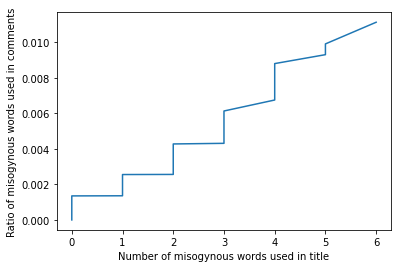

In [104]:
#Add csv files here
csv_files = ['AskReddit_1_1000.csv']

community_names = ['AskReddit']

cols = ['Subreddit', 'Total Posts', 'Mis. Posts','Belitting','FlippingNarr','Homophobia', 'Hostility', 
                                       'Patriarchy', 'P. Violence', 'Racism', 'S. Violence', 'Stoicism']

percentage_table = pd.DataFrame(columns =cols) 

for i in range(len(csv_files)):

  data = process_and_display_data(csv_files[i])
  lexicon = load_lexicon()
  data, mis_words_used = fill_table(data, lexicon)
  
  # new_row = add_to_percentage_table(data, community_names[i], cols)
  # percentage_table = percentage_table.append(new_row, ignore_index= True)
  # display_most_common_words(data, mis_words_used)
  # plot_graph(data)
  # display_perc_table(percentage_table)
  # plot_above18_graph(data)
  # plot_score_negativity(data)
  plot_title_negativity(data)
